In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install tensorflow-gpu==1.13.1
!pip install keras==2.1.5
print("Installed packages")

Installed packages


In [3]:
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

'2.1.5'

In [14]:
import os
import sys
import random
import numpy as np
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
import matplotlib.pyplot as plt

# import mrcnn.utils
# from mrcnn import utils
# # from mrcnn import config
# # from mrcnn.config import Config
# from mrcnn import model as modellib
# # import mrcnn.model 
# from mrcnn import visualize
# from mrcnn.model import log

os.chdir( "/content/drive/My Drive/Mobil_MRCNN")

# Root directory of the project
ROOT_DIR = os.getcwd()

# print("Uploading config.py from google colab")
# from google.colab import files
# src = list(files.upload().values())[0]
# open('config.py','wb').write(src)
# import config

# print("Uploading utils.py from google colab")
# src = list(files.upload().values())[0]
# open('utils.py','wb').write(src)
# import utils

# print("Uploading the model.py from google colab")
# src = list(files.upload().values())[0]
# open('model.py','wb').write(src)
# import model

# print("Uploading visualize.py from google colab")
# src = list(files.upload().values())[0]
# open('visualize.py','wb').write(src)
# import visualize

# print("Uploading coco.py from google colab")
# src = list(files.upload().values())[0]
# open('coco.py','wb').write(src)
# import coco



# from config import Config
import utils
import model as modellib
import visualize
from model import log
import coco



# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(MODEL_DIR, "mobile_mask_rcnn_coco_person.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

img_sz = 1024

%matplotlib inline

In [5]:
def get_ax(rows=1, cols=1, size=12):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
TRAIN_PATH = os.path.join("/content/drive/My Drive/Mask_RCNN", "train")
TRAIN_PATH_MASK = os.path.join("/content/drive/My Drive/Mask_RCNN", "train_masks")

Original image size is  7365120
Original mask size is  2455040


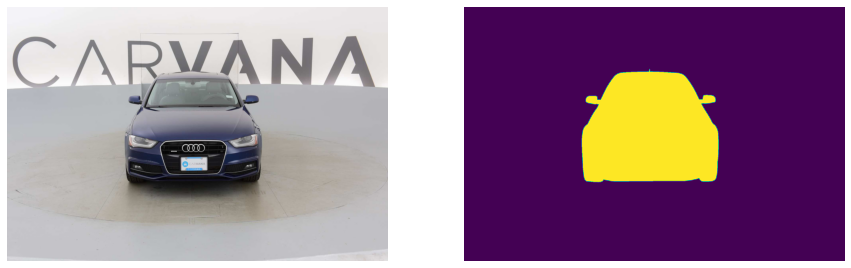

In [7]:
fig1 = plt.figure(figsize=(15,10))
# Plot an image
fig1.add_subplot(1, 2, 1)
Im1 = imread(os.path.join(TRAIN_PATH, '0cdf5b5d0ce1_01.jpg'))
plt.imshow(Im1)
plt.axis('off')
# Plot its mask
fig1.add_subplot(1, 2, 2)
Im1_msk = imread(os.path.join(TRAIN_PATH_MASK, '0cdf5b5d0ce1_01_mask.gif'))
plt.imshow(Im1_msk)
plt.axis('off')
# Plot the resized image
print('Original image size is ', Im1.size)
print('Original mask size is ', Im1_msk.size)

In [8]:
train_ids = next(os.walk(TRAIN_PATH))
train_mask_ids=next(os.walk(TRAIN_PATH_MASK))

xyz=[]
for i in train_ids[2]:
    xyz.append(i.split(".")[0])
train_ids=xyz

xyz=[]
for i in train_mask_ids[2]:
    xyz.append(i.split("_mask.")[0])
train_mask_ids=xyz

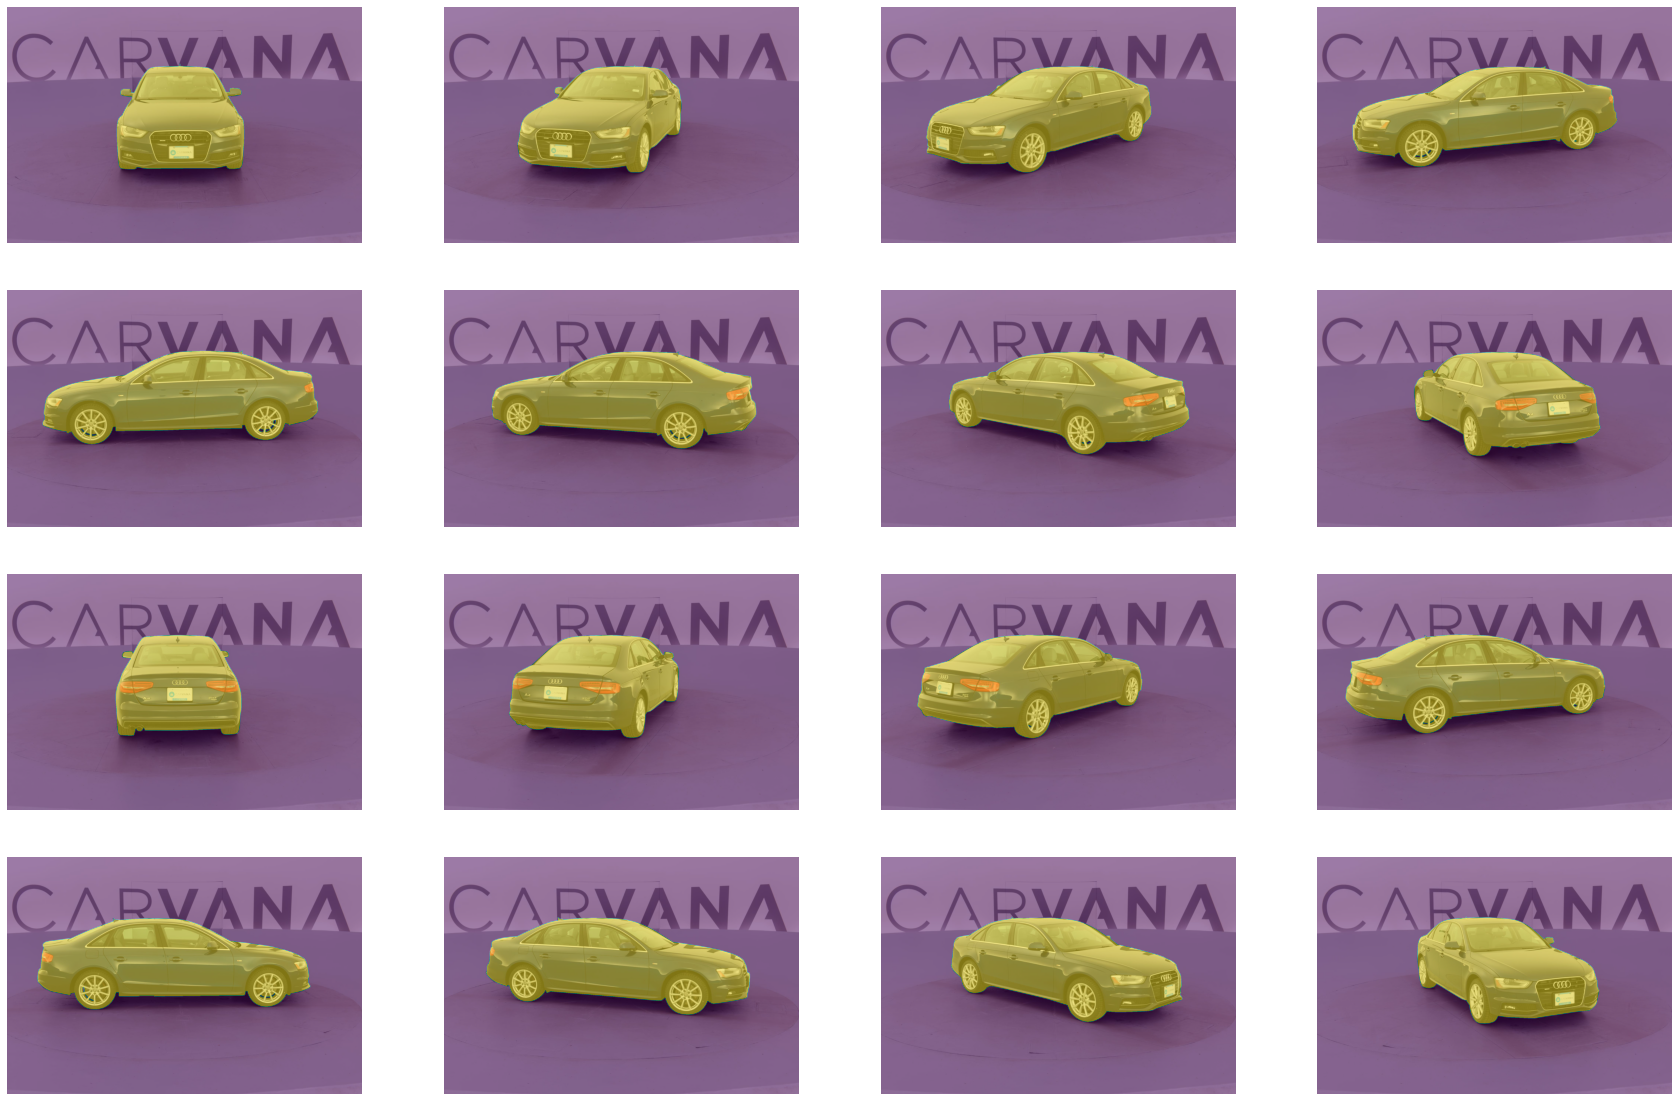

In [9]:
imgg='0cdf5b5d0ce1'
fig2 = plt.figure(figsize=(30,20))

for i in range(16):
    fig2.add_subplot(4, 4, i+1)
    if i < 9:
        Im2 = imread(os.path.join(TRAIN_PATH, imgg+'_0' + str(i+1) + '.jpg'))
        plt.imshow(Im2)
        Im2_msk = imread(os.path.join(TRAIN_PATH_MASK, imgg+'_0' + str(i+1) + '_mask.gif'))
        plt.imshow(Im2_msk , alpha=0.5)
        plt.axis('off')
    else:
        Im2 = imread(os.path.join(TRAIN_PATH, imgg+'_' + str(i+1) + '.jpg'))
        plt.imshow(Im2)
        Im2_msk = imread(os.path.join(TRAIN_PATH_MASK, imgg+'_' + str(i+1) + '_mask.gif'))
        plt.imshow(Im2_msk , alpha=0.5)
        plt.axis('off')

In [22]:
from config import Config
class ShapesConfig(Config):
    """Configuration for training on the dataset.
    Derives from the base Config class and overrides values specific
    to the dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 1 images per GPU. We can put multiple images on each
    # GPU. Batch size is (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + nucleus

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 800
    IMAGE_MAX_DIM = 1024

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 64, 128, 256)  # anchor side in pixels

    # Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 800

    # set number of epoch
    STEPS_PER_EPOCH = 200

    # set validation steps 
    VALIDATION_STEPS = 50
    
config = ShapesConfig()
config.display()


Configurations:
BACKBONE                       mobilenet
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [23]:
class ShapesDataset(utils.Dataset):
    
    def load_shapes(self, mode):
        
        # Add classes
        self.add_class("shapes", 1, "car")
        

        if mode == "train":  
            for n, id_ in enumerate(train_ids):
                if n < int(len(train_ids) * 0.8):
                  self.add_image("shapes", image_id=id_, path=TRAIN_PATH)
              
        if mode == "val":   
            for n, id_ in enumerate(train_ids):
                if n >= int(len(train_ids) * 0.8):
                  self.add_image("shapes", image_id=id_, path=TRAIN_PATH)      

    def load_image(self, image_id):
        
        info = self.image_info[image_id]
        info = info.get("id")
       
        path = os.path.join(TRAIN_PATH, info)
        img = imread(path + '.jpg')
        img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
       
        return img

    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)

    def load_mask(self, image_id):
        """Generate instance masks for shapes of the given image ID.
        """
        
        info = self.image_info[image_id]
        info = info.get("id")
        path_mask = os.path.join(TRAIN_PATH_MASK, info)
        number_of_masks = 1
        mask = np.zeros([config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1], number_of_masks], dtype=np.uint8)
        mask_ = imread(path_mask + '_mask.gif')
        mask_ = resize(mask_, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
        mask[:, :,0] = mask_
            
        # Map class names to class IDs.
        class_ids = np.ones((number_of_masks,), dtype=int)
        
        return mask, class_ids.astype(np.int32)

In [24]:
# Training dataset
dataset_train = ShapesDataset()
dataset_train.load_shapes("train")
dataset_train.prepare()

# Validation dataset
dataset_val = ShapesDataset()
dataset_val.load_shapes("val")
dataset_val.prepare()

In [ ]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Create model object in inference mode.
model1 = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=inference_config)

# Load weights trained on MS-COCO
model1.load_weights(COCO_MODEL_PATH, by_name=True)

In [25]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (1280, 1918, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1918.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.22900  float32

*** No instances to display *** 



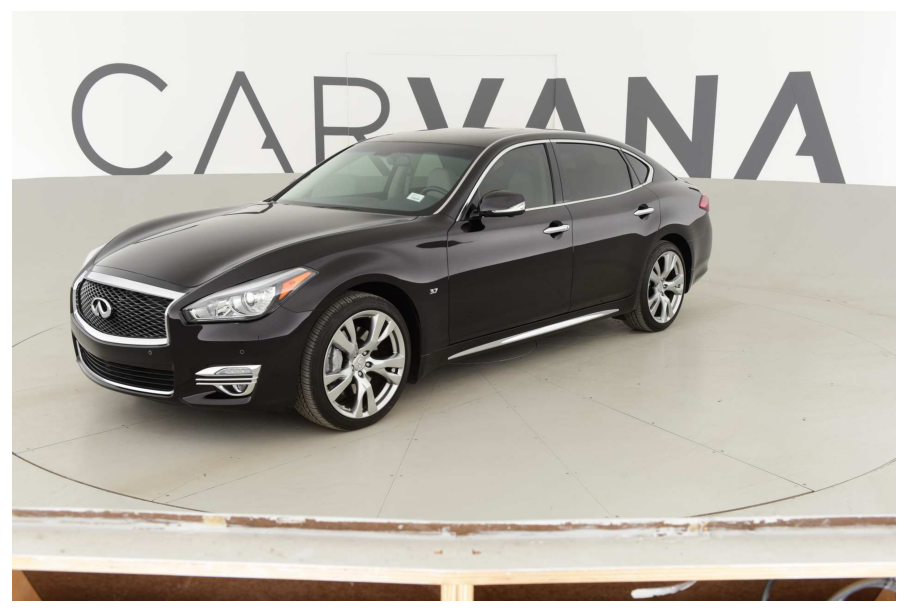

In [26]:
# Load a random image from the images folder
file_names = next(os.walk(TRAIN_PATH))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, '29bb3ece3180_11.jpg'))
image = imread(os.path.join(TRAIN_PATH, random.choice(file_names)))

# Run detection
results = model1.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [27]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [28]:
COCO_MODEL_PATH

'/content/drive/My Drive/Mobil_MRCNN/logs/mobile_mask_rcnn_coco_person.h5'

In [29]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

In [30]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
import imgaug
augmentation = imgaug.augmenters.Fliplr(0.5)
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE, 
            epochs=40, 
            layers='heads',
            augmentation=augmentation)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/Mobil_MRCNN/logs/shapes20200628T0651/mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistributed)
mrcnn_class_logits     (TimeDistributed)
mrcnn_mask             (TimeDistributed)
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/40
199/200 [============================>.] - ETA: 0s - loss: 2.6860 - rpn_class_loss: 0.0237 - rpn_bbox_loss: 1.5803 - mrcnn_class_loss: 0.0337 - mrcnn_bbox_loss: 0.3666 - mrcnn_mask_loss: 0.6816

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


200/200 [==============================] - 128s 642ms/step - loss: 2.6790 - rpn_class_loss: 0.0237 - rpn_bbox_loss: 1.5746 - mrcnn_class_loss: 0.0337 - mrcnn_bbox_loss: 0.3655 - mrcnn_mask_loss: 0.6816 - val_loss: 1.6519 - val_rpn_class_loss: 0.0117 - val_rpn_bbox_loss: 0.7552 - val_mrcnn_class_loss: 0.0282 - val_mrcnn_bbox_loss: 0.1709 - val_mrcnn_mask_loss: 0.6859
Epoch 2/40
200/200 [==============================] - 116s 579ms/step - loss: 1.6404 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.7744 - mrcnn_class_loss: 0.0238 - mrcnn_bbox_loss: 0.1493 - mrcnn_mask_loss: 0.6835 - val_loss: 1.5416 - val_rpn_class_loss: 0.0074 - val_rpn_bbox_loss: 0.6967 - val_mrcnn_class_loss: 0.0222 - val_mrcnn_bbox_loss: 0.1316 - val_mrcnn_mask_loss: 0.6837
Epoch 3/40
200/200 [==============================] - 116s 579ms/step - loss: 1.4269 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.6130 - mrcnn_class_loss: 0.0214 - mrcnn_bbox_loss: 0.1068 - mrcnn_mask_loss: 0.6792 - val_loss: 1.4215 - val_rpn_class_los

In [25]:
# import imgaug
# augmentation = imgaug.augmenters.Fliplr(0.5)
# model.train(dataset_train, dataset_val,
#             learning_rate=config.LEARNING_RATE,
#             epochs=30,
#             layers="5+",
#             augmentation=augmentation)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/Mobil_MRCNN/logs/shapes20200627T1211/mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
conv_dw_13             (DepthwiseConv2D)
conv_dw_13_bn          (BatchNorm)
conv_pw_13             (Conv2D)
conv_pw_13_bn          (BatchNorm)
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistributed)
mrcnn_class_logits     (TimeDistributed)
mrcnn_mask       

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/30
199/200 [============================>.] - ETA: 0s - loss: 1.3826 - rpn_class_loss: 0.0041 - rpn_bbox_loss: 0.4656 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.1750 - mrcnn_mask_loss: 0.6872

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


200/200 [==============================] - 252s 1s/step - loss: 1.3856 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.4684 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.1752 - mrcnn_mask_loss: 0.6872 - val_loss: 1.5975 - val_rpn_class_loss: 0.0067 - val_rpn_bbox_loss: 0.7478 - val_mrcnn_class_loss: 0.0247 - val_mrcnn_bbox_loss: 0.1343 - val_mrcnn_mask_loss: 0.6839
Epoch 2/30
200/200 [==============================] - 188s 939ms/step - loss: 1.2673 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.4696 - mrcnn_class_loss: 0.0207 - mrcnn_bbox_loss: 0.0903 - mrcnn_mask_loss: 0.6812 - val_loss: 1.2133 - val_rpn_class_loss: 0.0060 - val_rpn_bbox_loss: 0.4254 - val_mrcnn_class_loss: 0.0184 - val_mrcnn_bbox_loss: 0.0840 - val_mrcnn_mask_loss: 0.6793
Epoch 3/30
200/200 [==============================] - 200s 1s/step - loss: 1.2343 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.4629 - mrcnn_class_loss: 0.0167 - mrcnn_bbox_loss: 0.0711 - mrcnn_mask_loss: 0.6780 - val_loss: 1.2942 - val_rpn_class_loss: 0.0

In [52]:
# # Fine tune all layers
# # Passing layers="all" trains all layers. You can also 
# # pass a regular expression to select which layers to
# # train by name pattern.
# model.train(dataset_train, dataset_val, 
#             learning_rate=config.LEARNING_RATE / 10,
#             epochs=20, 
#             layers="all")


Starting at epoch 0. LR=0.0001

Checkpoint Path: /content/drive/My Drive/Mobil_MRCNN/logs/shapes20200627T1448/mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
conv1_bn               (BatchNorm)
conv_dw_1              (DepthwiseConv2D)
conv_dw_1_bn           (BatchNorm)
conv_pw_1              (Conv2D)
conv_pw_1_bn           (BatchNorm)
conv_dw_2              (DepthwiseConv2D)
conv_dw_2_bn           (BatchNorm)
conv_pw_2              (Conv2D)
conv_pw_2_bn           (BatchNorm)
conv_dw_3              (DepthwiseConv2D)
conv_dw_3_bn           (BatchNorm)
conv_pw_3              (Conv2D)
conv_pw_3_bn           (BatchNorm)
conv_dw_4              (DepthwiseConv2D)
conv_dw_4_bn           (BatchNorm)
conv_pw_4              (Conv2D)
conv_pw_4_bn           (BatchNorm)
conv_dw_5              (DepthwiseConv2D)
conv_dw_5_bn           (BatchNorm)
conv_pw_5              (Conv2D)
conv_pw_5_bn           (BatchNorm)
conv_dw_6              (DepthwiseConv2D)
conv_dw_

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/20
199/200 [============================>.] - ETA: 0s - loss: 1.6053 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.3777 - mrcnn_class_loss: 0.0323 - mrcnn_bbox_loss: 0.4942 - mrcnn_mask_loss: 0.6940

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


200/200 [==============================] - 190s 952ms/step - loss: 1.6047 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.3780 - mrcnn_class_loss: 0.0323 - mrcnn_bbox_loss: 0.4933 - mrcnn_mask_loss: 0.6940 - val_loss: 1.5465 - val_rpn_class_loss: 0.0027 - val_rpn_bbox_loss: 0.4392 - val_mrcnn_class_loss: 0.0266 - val_mrcnn_bbox_loss: 0.3801 - val_mrcnn_mask_loss: 0.6938
Epoch 2/20
200/200 [==============================] - 163s 814ms/step - loss: 1.4384 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.3793 - mrcnn_class_loss: 0.0258 - mrcnn_bbox_loss: 0.3318 - mrcnn_mask_loss: 0.6939 - val_loss: 1.5091 - val_rpn_class_loss: 0.0034 - val_rpn_bbox_loss: 0.4919 - val_mrcnn_class_loss: 0.0243 - val_mrcnn_bbox_loss: 0.2914 - val_mrcnn_mask_loss: 0.6939
Epoch 3/20
200/200 [==============================] - 163s 813ms/step - loss: 1.3213 - rpn_class_loss: 0.0027 - rpn_bbox_loss: 0.3551 - mrcnn_class_loss: 0.0222 - mrcnn_bbox_loss: 0.2435 - mrcnn_mask_loss: 0.6937 - val_loss: 1.3402 - val_rpn_class_los

In [31]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mobile_mrcnn_shapes_1.h5")
model.keras_model.save_weights(model_path)

In [32]:
class InferenceConfig1(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.9


inference_config = InferenceConfig1()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
print(model_path)
# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

/content/drive/My Drive/Mobil_MRCNN/logs/mobile_mrcnn_shapes_1.h5
Loading weights from  /content/drive/My Drive/Mobil_MRCNN/logs/mobile_mrcnn_shapes_1.h5


In [33]:
ls -l logs/

total 596319
drwx------ 2 root root     4096 Jun 28 01:39 mmrcnn_cocoperson20200627T1557/
drwx------ 2 root root     4096 Jun 27 17:54 mmrcnn_cocoperson20200627T1754/
drwx------ 2 root root     4096 Jun 27 21:03 mmrcnn_cocoperson20200627T2103/
drwx------ 2 root root     4096 Jun 28 01:25 mmrcnn_cocoperson20200628T0125/
drwx------ 2 root root     4096 Jun 28 01:43 mmrcnn_cocoperson20200628T0143/
drwx------ 2 root root     4096 Jun 28 03:43 mmrcnn_cocoperson20200628T0343/
drwx------ 2 root root     4096 Jun 28 05:17 mmrcnn_cocoperson20200628T0517/
drwx------ 2 root root     4096 Jun 28 05:18 mmrcnn_cocoperson20200628T0518/
-rw------- 1 root root 87221728 Jun 28 03:43 mobile_mask_rcnn_coco_person1.h5
-rw------- 1 root root 87221728 Jun 28 04:54 mobile_mask_rcnn_coco_person2.h5
-rw------- 1 root root 87222040 Jun 28 06:34 mobile_mask_rcnn_coco_person.h5
-rw------- 1 root root 87221728 Jun 28 08:08 mobile_mrcnn_shapes_1.h5
-rw------- 1 root root 87221728 Jun 27 08:48 mobile_mrcnn_shapes3.h5

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  float64
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int64
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   64.00000  max:  875.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:  255.00000  uint8


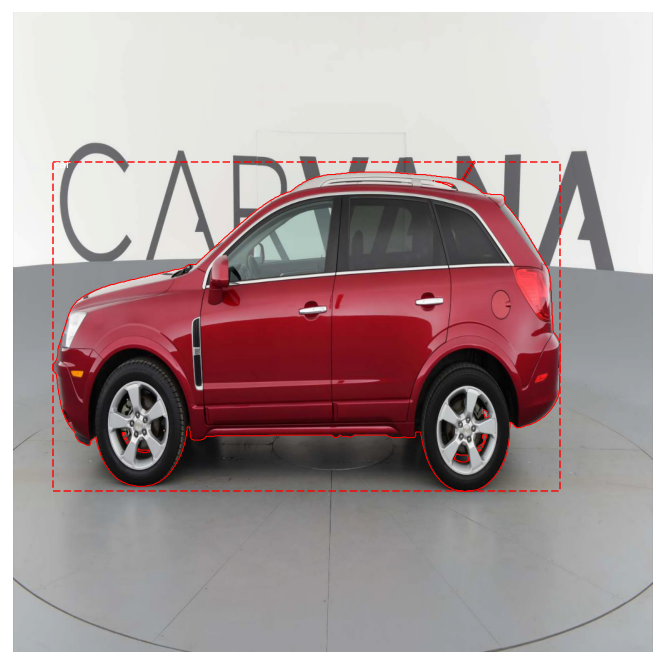

In [34]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8), ax=get_ax())

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.09573  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32


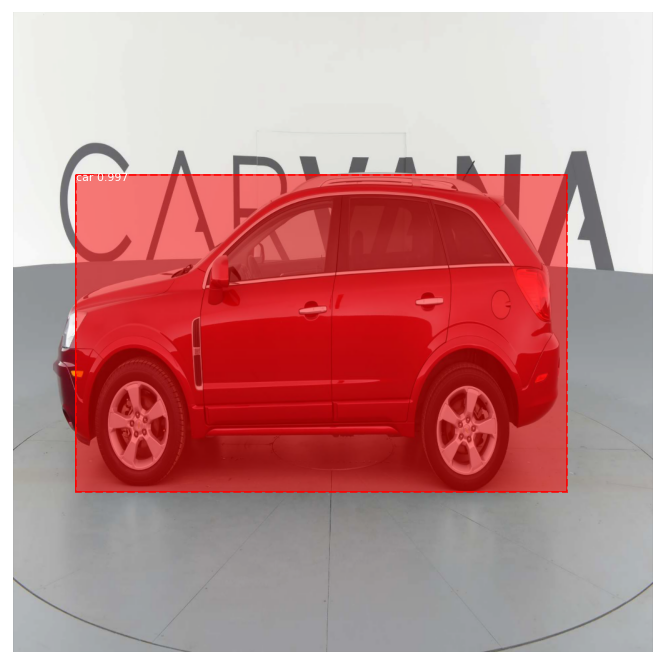

In [35]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_train.class_names, r['scores'], ax=get_ax())

In [36]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 30 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 30)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  1.0


Processing 1 images
image                    shape: (1500, 2000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2000.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processing 1 images
image                    shape: (1500, 2000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 2000.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.22900  float32

*** No instances to display *** 



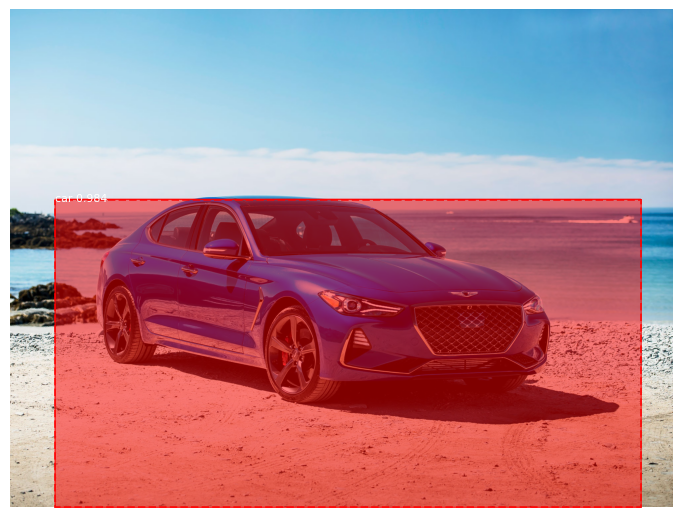

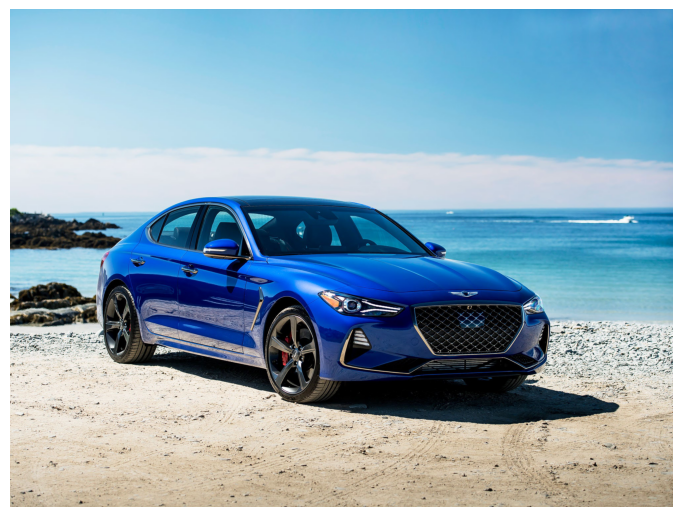

In [43]:
TEST_PATH = os.path.join("/content/drive/My Drive/Mask_RCNN", "test_DB")
test_ids = next(os.walk(TEST_PATH))
image_id = random.choice(test_ids[2])
image = os.path.join(TEST_PATH, image_id)
img = imread(image)
results = model.detect([img], verbose=1)

r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            dataset_train.class_names, r['scores'], ax=get_ax())

# Run detection
results1 = model1.detect([img], verbose=1)

# Visualize results
r1 = results1[0]
visualize.display_instances(img, r1['rois'], r1['masks'], r1['class_ids'],
                            class_names, r1['scores'], ax=get_ax())

In [ ]:
drive.flush_and_unmount()